# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | matoury
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | san antonio de pale
Processing Record 8 of Set 1 | magog
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | shanhecun
Processing Record 12 of Set 1 | flying fish cove
Processing Record 13 of Set 1 | les avirons
Processing Record 14 of Set 1 | statesboro
Processing Record 15 of Set 1 | fale old settlement
Processing Record 16 of Set 1 | kailua-kona
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 19 of Set 1 | saipan
Processing Record 20 of Set 1 | kyabe
Processing Record 21

Processing Record 37 of Set 4 | ar raqqah
Processing Record 38 of Set 4 | brak
Processing Record 39 of Set 4 | yuxi
Processing Record 40 of Set 4 | hermanus
Processing Record 41 of Set 4 | remire-montjoly
Processing Record 42 of Set 4 | nema
Processing Record 43 of Set 4 | adrar
Processing Record 44 of Set 4 | fort bragg
Processing Record 45 of Set 4 | antsiranana
Processing Record 46 of Set 4 | ozar
Processing Record 47 of Set 4 | revda
Processing Record 48 of Set 4 | saint-philippe
Processing Record 49 of Set 4 | gobabis
Processing Record 0 of Set 5 | khandud
Processing Record 1 of Set 5 | crane
Processing Record 2 of Set 5 | san pedro pochutla
Processing Record 3 of Set 5 | accra
Processing Record 4 of Set 5 | solvesborg
City not found. Skipping...
Processing Record 5 of Set 5 | mount isa
Processing Record 6 of Set 5 | vilyuysk
Processing Record 7 of Set 5 | yangor
City not found. Skipping...
Processing Record 8 of Set 5 | valday
Processing Record 9 of Set 5 | tsaratanana
Processing

Processing Record 30 of Set 8 | fredericksburg
Processing Record 31 of Set 8 | egilsstadir
Processing Record 32 of Set 8 | lib
Processing Record 33 of Set 8 | nizhnesortymskiy
Processing Record 34 of Set 8 | bulgan
Processing Record 35 of Set 8 | manggar
Processing Record 36 of Set 8 | sharhorod
Processing Record 37 of Set 8 | ponta delgada
Processing Record 38 of Set 8 | rabaul
Processing Record 39 of Set 8 | pierre
Processing Record 40 of Set 8 | guarapari
Processing Record 41 of Set 8 | mhamid
Processing Record 42 of Set 8 | taoudenni
Processing Record 43 of Set 8 | sastre
Processing Record 44 of Set 8 | gamba
Processing Record 45 of Set 8 | torghay
Processing Record 46 of Set 8 | lindale
Processing Record 47 of Set 8 | ust-tsilma
Processing Record 48 of Set 8 | keflavik
Processing Record 49 of Set 8 | arteche
Processing Record 0 of Set 9 | iaciara
Processing Record 1 of Set 9 | cestos city
Processing Record 2 of Set 9 | celendin
Processing Record 3 of Set 9 | sidi qacem
Processing 

Processing Record 21 of Set 12 | barabinsk
Processing Record 22 of Set 12 | paita
Processing Record 23 of Set 12 | xilin hot
Processing Record 24 of Set 12 | adzope
Processing Record 25 of Set 12 | graaff-reinet
Processing Record 26 of Set 12 | vila do maio
Processing Record 27 of Set 12 | glace bay
Processing Record 28 of Set 12 | falmouth
Processing Record 29 of Set 12 | masan
Processing Record 30 of Set 12 | verkhniy baskunchak
Processing Record 31 of Set 12 | tual
Processing Record 32 of Set 12 | kargat
Processing Record 33 of Set 12 | peterhead
Processing Record 34 of Set 12 | pisco
Processing Record 35 of Set 12 | qaisumah
Processing Record 36 of Set 12 | caleta de carquin
Processing Record 37 of Set 12 | yuci
Processing Record 38 of Set 12 | zhongshu
Processing Record 39 of Set 12 | oxapampa
Processing Record 40 of Set 12 | abalak
Processing Record 41 of Set 12 | wellington
Processing Record 42 of Set 12 | tanki leendert
City not found. Skipping...
Processing Record 43 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,61.20,91,75,13.80,US,1702143534
1,matoury,4.8483,-52.3317,87.76,58,100,9.22,GF,1702143534
2,grytviken,-54.2811,-36.5092,35.01,88,53,13.31,GS,1702143534
3,longyearbyen,78.2186,15.6401,24.64,93,100,8.05,SJ,1702143367
4,waitangi,-43.9535,-176.5597,57.81,87,72,11.01,NZ,1702143535


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,61.20,91,75,13.80,US,1702143534
1,matoury,4.8483,-52.3317,87.76,58,100,9.22,GF,1702143534
2,grytviken,-54.2811,-36.5092,35.01,88,53,13.31,GS,1702143534
3,longyearbyen,78.2186,15.6401,24.64,93,100,8.05,SJ,1702143367
4,waitangi,-43.9535,-176.5597,57.81,87,72,11.01,NZ,1702143535


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

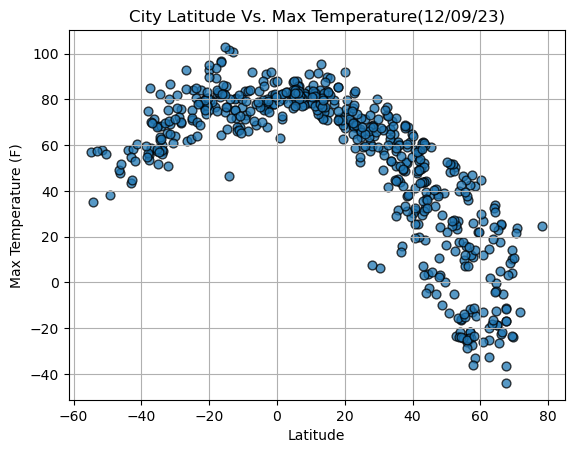

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",s=40,alpha=.75, edgecolors="black")



# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

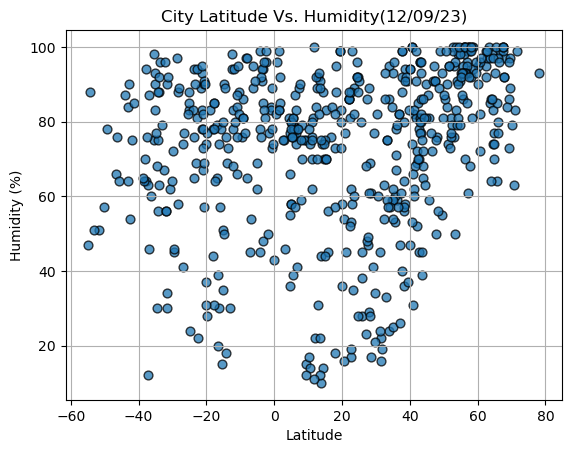

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",s=40,alpha=.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

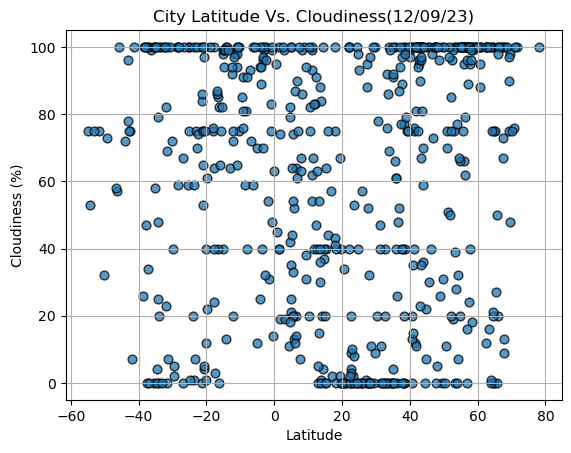

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",s=40,alpha=.75, edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

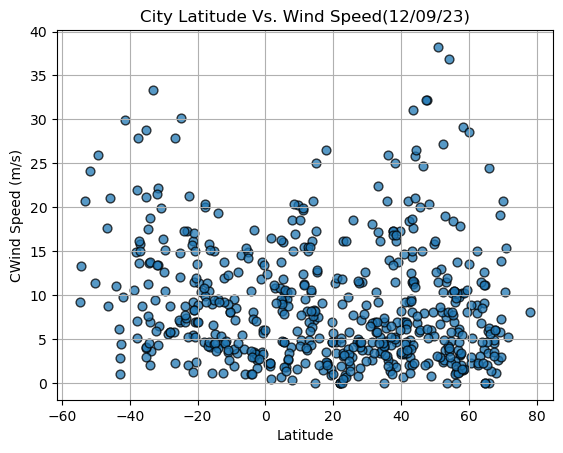

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",s=40,alpha=.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("CWind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [273]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Plot scatter plot
    plt.scatter(x_values, y_values, marker="o", s=40, alpha=.45, edgecolors="blue")

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Calculate text position based on data range
    text_position = (x_values.min() + (x_values.max() - x_values.min()) * 0.5,
                     y_values.min() + (y_values.max() - y_values.min()) * 0.9)

    # Annotate the regression equation
    plt.annotate(line_eq, text_position, fontsize=15, color="r", weight="bold")

    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Print r square value
    print(f"The correlation coefficient (r) is: {rvalue}")
    print(f"The p-value is: {pvalue}")

    # Show the plot
    plt.show()

In [274]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,61.20,91,75,13.80,US,1702143534
1,matoury,4.8483,-52.3317,87.76,58,100,9.22,GF,1702143534
3,longyearbyen,78.2186,15.6401,24.64,93,100,8.05,SJ,1702143367
7,magog,45.2668,-72.1491,38.23,87,100,5.75,CA,1702143395
9,petropavlovsk-kamchatsky,53.0452,158.6483,23.45,76,75,18.99,RU,1702143535


In [275]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,35.01,88,53,13.31,GS,1702143534
4,waitangi,-43.9535,-176.5597,57.81,87,72,11.01,NZ,1702143535
5,port-aux-francais,-49.3500,70.2167,38.25,78,73,25.90,TF,1702143470
6,san antonio de pale,-1.4014,5.6325,81.84,77,31,11.86,GQ,1702143535
8,puerto natales,-51.7236,-72.4875,57.65,51,75,24.16,CL,1702143535


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient (r) is: -0.8510872080278166
The p-value is: 9.659823003067975e-112


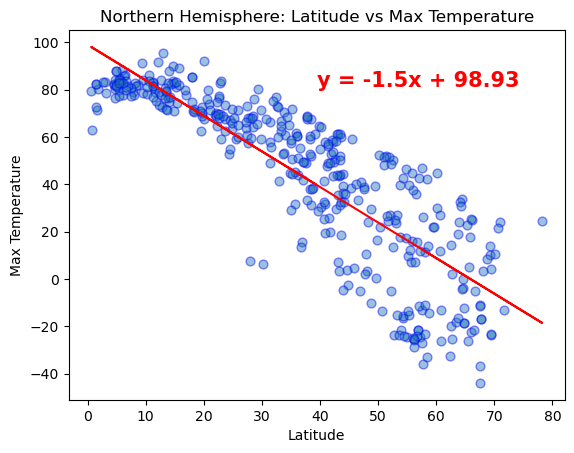

In [276]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    "Latitude",
    "Max Temperature",
    "Northern Hemisphere: Latitude vs Max Temperature"
)

The correlation coefficient (r) is: 0.6416749861285164
The p-value is: 6.396231284430918e-22


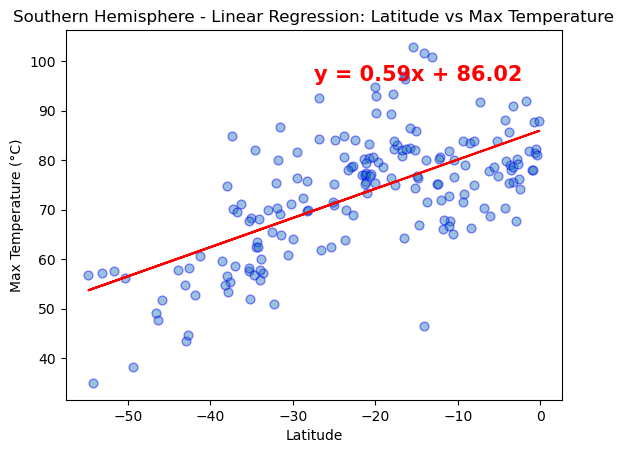

In [277]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Max Temp'],
    "Latitude",
    "Max Temperature (°C)",
    "Southern Hemisphere - Linear Regression: Latitude vs Max Temperature"
)

**Discussion about the linear relationship:** 
The linear regression illustrates that the temperature of the Northern Hemisphere decreases as the latitude increases and gets further from the equature (0). Meanwhile for the Southern Hemisphere, as the latitude gets closer to the equator, the temperature increases. The regression line and tighlty clustered scatter plots show that there is a strong correlation between temperature and latitude. 

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient (r) is: 0.37892532920781563
The p-value is: 6.70344066183868e-15


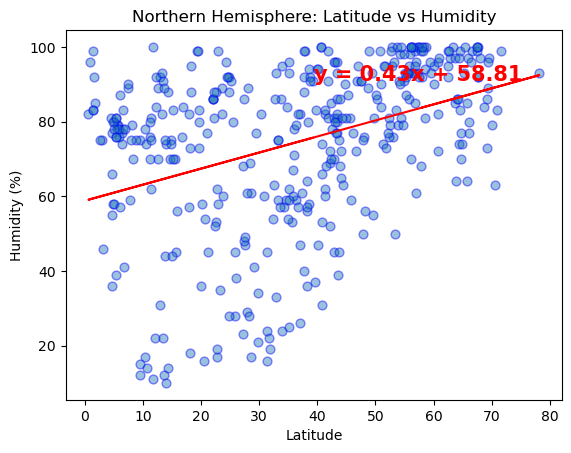

In [278]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere: Latitude vs Humidity"
)

The correlation coefficient (r) is: 0.12926624004545847
The p-value is: 0.08638326196271907


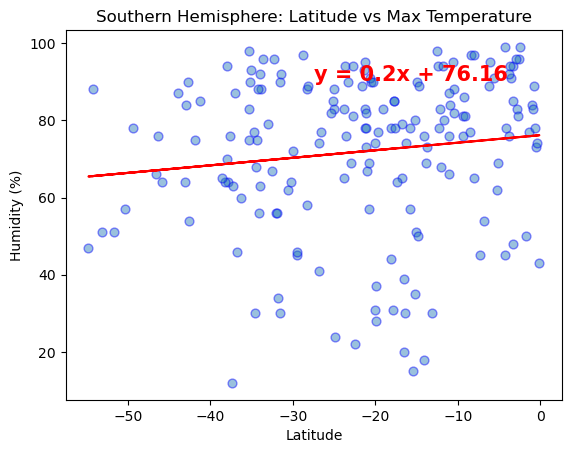

In [279]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere: Latitude vs Max Temperature"
)

**Discussion about the linear relationship:** 
Based on the regression line and loosely clustered scatter plot, for the Southern and Northern Hempisheres, there does not appear to be a strong relationship between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient (r) is: 0.2708829779013481
The p-value is: 4.701467650745143e-08


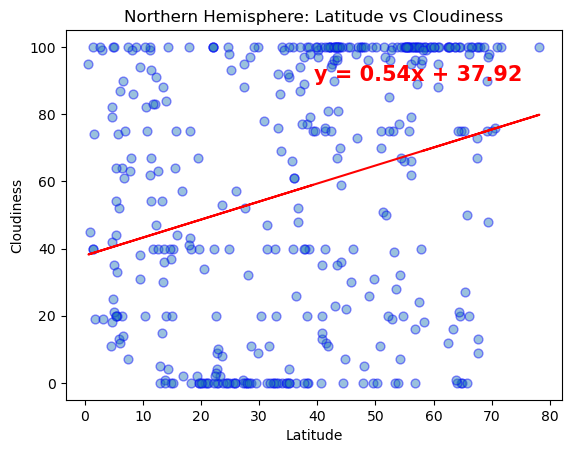

In [280]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    "Latitude",
    "Cloudiness",
    "Northern Hemisphere: Latitude vs Cloudiness"
)

The correlation coefficient (r) is: 0.14637397286075252
The p-value is: 0.051887573578905416


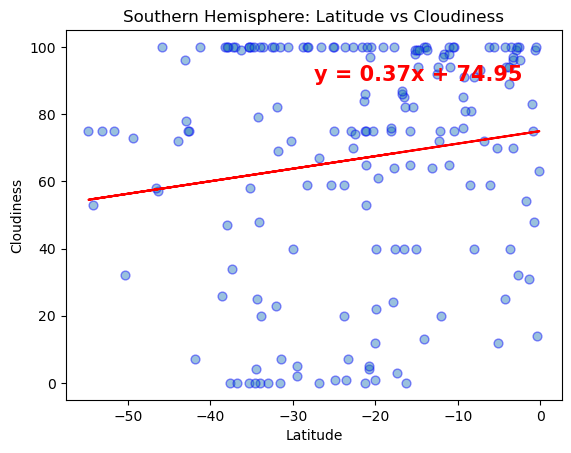

In [281]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    "Latitude",
    "Cloudiness",
    "Southern Hemisphere: Latitude vs Cloudiness"
)

**Discussion about the linear relationship:** There is no relationship between cloudiness and latitude based on the regression analyses for the Southern and Northern Hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient (r) is: 0.008357521418192572
The p-value is: 0.8686544380549626


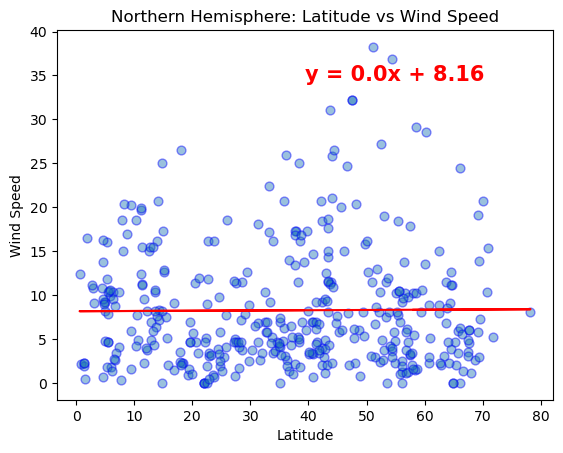

In [282]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    "Latitude",
    "Wind Speed",
    "Northern Hemisphere: Latitude vs Wind Speed"
)

The correlation coefficient (r) is: -0.3755563587761548
The p-value is: 2.5929709915146745e-07


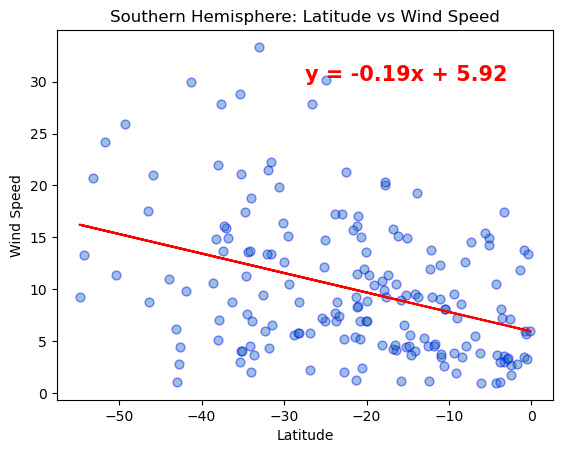

In [283]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    "Latitude",
    "Wind Speed",
    "Southern Hemisphere: Latitude vs Wind Speed"
)

**Discussion about the linear relationship:** While windspeed and latitude don't appear to be strongly related, we can see that for both the Northern and Southern hemispheres the wind speed is typically under 25. 